In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [5]:
from citipy import citipy

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

600

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bowen
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | bathsheba
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | tangping
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | najran
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | murdochville
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | amapa
Processing Record 14 of Set 1 | wajir
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | hervey bay
Processing Record 18 of Set 1 | clyde river
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | pompeu
Processing Record 22 of Set 1 | vaini
Processing Record 23 of Set 1 | faya
Processing Record

Processing Record 41 of Set 4 | vilhena
Processing Record 42 of Set 4 | bandarbeyla
Processing Record 43 of Set 4 | havoysund
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | vila franca do campo
Processing Record 46 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 4 | half moon bay
Processing Record 48 of Set 4 | khasan
Processing Record 49 of Set 4 | morondava
Processing Record 50 of Set 4 | airai
Processing Record 1 of Set 5 | marabba
Processing Record 2 of Set 5 | jerantut
Processing Record 3 of Set 5 | bandarban
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | provideniya
Processing Record 6 of Set 5 | shingu
Processing Record 7 of Set 5 | college
Processing Record 8 of Set 5 | taltal
Processing Record 9 of Set 5 | bagotville
Processing Record 10 of Set 5 | toliary
City not found. Skipping...
Processing Record 11 of Set 5 | adet
Processing Record 12 of Set 5 | tiksi
Processing Record 13 of Set 5 | no

Processing Record 29 of Set 8 | orsha
Processing Record 30 of Set 8 | chabahar
Processing Record 31 of Set 8 | buraydah
Processing Record 32 of Set 8 | hithadhoo
Processing Record 33 of Set 8 | gusau
Processing Record 34 of Set 8 | ouahigouya
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | vaxjo
Processing Record 37 of Set 8 | tasiilaq
Processing Record 38 of Set 8 | ihosy
Processing Record 39 of Set 8 | sorvag
City not found. Skipping...
Processing Record 40 of Set 8 | saint-louis
Processing Record 41 of Set 8 | jambi
Processing Record 42 of Set 8 | klitos
Processing Record 43 of Set 8 | ribeira brava
Processing Record 44 of Set 8 | excelsior springs
Processing Record 45 of Set 8 | cabo san lucas
Processing Record 46 of Set 8 | belyy yar
Processing Record 47 of Set 8 | waipawa
Processing Record 48 of Set 8 | kuito
Processing Record 49 of Set 8 | kongwa
Processing Record 50 of Set 8 | viedma
Processing Record 1 of Set 9 | rosarito
Processing Record 2 of Set 

Processing Record 18 of Set 12 | talaya
Processing Record 19 of Set 12 | zhanakorgan
Processing Record 20 of Set 12 | vila velha
Processing Record 21 of Set 12 | sinkat
City not found. Skipping...
Processing Record 22 of Set 12 | lensk
Processing Record 23 of Set 12 | bazaliya
Processing Record 24 of Set 12 | stornoway
Processing Record 25 of Set 12 | beloha
Processing Record 26 of Set 12 | ponta delgada
Processing Record 27 of Set 12 | coihaique
Processing Record 28 of Set 12 | chikwawa
Processing Record 29 of Set 12 | pangnirtung
Processing Record 30 of Set 12 | port blair
Processing Record 31 of Set 12 | puerto boyaca
Processing Record 32 of Set 12 | barreirinha
Processing Record 33 of Set 12 | esna
Processing Record 34 of Set 12 | ondjiva
Processing Record 35 of Set 12 | vincennes
Processing Record 36 of Set 12 | indiaroba
Processing Record 37 of Set 12 | inuvik
Processing Record 38 of Set 12 | tanga
Processing Record 39 of Set 12 | sayyan
Processing Record 40 of Set 12 | tura
Proc

In [9]:
len(city_data)

556

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bowen,-20.0167,148.2333,67.17,59,0,6.89,AU,2022-07-09 01:30:42
1,Kaitangata,-46.2817,169.8464,43.84,87,100,17.98,NZ,2022-07-09 01:30:42
2,Bathsheba,13.2167,-59.5167,81.21,91,40,19.57,BB,2022-07-09 01:30:42
3,Norman Wells,65.2820,-126.8329,84.24,28,75,10.36,CA,2022-07-09 01:30:43
4,Carnarvon,-24.8667,113.6333,69.44,33,0,9.95,AU,2022-07-09 01:30:43
5,Tangping,22.0265,111.9323,86.11,72,50,4.34,CN,2022-07-09 01:30:43
6,Busselton,-33.6500,115.3333,64.02,86,100,25.81,AU,2022-07-09 01:30:43
7,Najran,17.4924,44.1277,83.05,52,100,12.26,SA,2022-07-09 01:30:44
8,Mataura,-46.1927,168.8643,43.48,94,100,8.50,NZ,2022-07-09 01:30:44
9,Murdochville,48.9583,-65.5006,54.48,93,6,3.94,CA,2022-07-09 01:30:44


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bowen,AU,2022-07-09 01:30:42,-20.0167,148.2333,67.17,59,0,6.89
1,Kaitangata,NZ,2022-07-09 01:30:42,-46.2817,169.8464,43.84,87,100,17.98
2,Bathsheba,BB,2022-07-09 01:30:42,13.2167,-59.5167,81.21,91,40,19.57
3,Norman Wells,CA,2022-07-09 01:30:43,65.2820,-126.8329,84.24,28,75,10.36
4,Carnarvon,AU,2022-07-09 01:30:43,-24.8667,113.6333,69.44,33,0,9.95


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

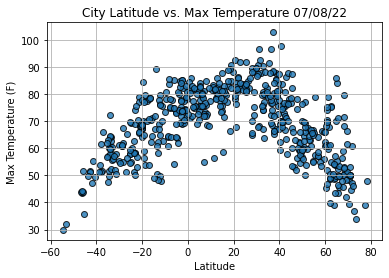

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

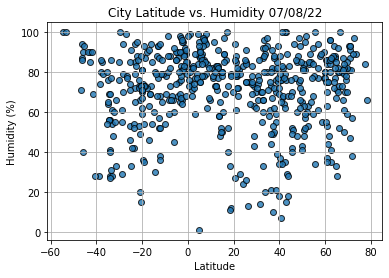

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

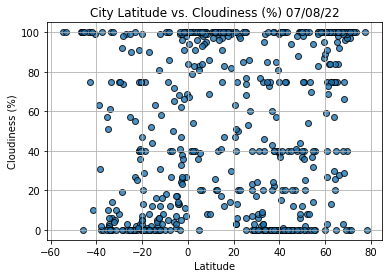

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

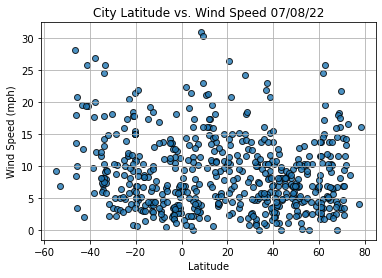

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Bathsheba,BB,2022-07-09 01:30:42,13.2167,-59.5167,81.21,91,40,19.57
3,Norman Wells,CA,2022-07-09 01:30:43,65.2820,-126.8329,84.24,28,75,10.36
5,Tangping,CN,2022-07-09 01:30:43,22.0265,111.9323,86.11,72,50,4.34
7,Najran,SA,2022-07-09 01:30:44,17.4924,44.1277,83.05,52,100,12.26
9,Murdochville,CA,2022-07-09 01:30:44,48.9583,-65.5006,54.48,93,6,3.94


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

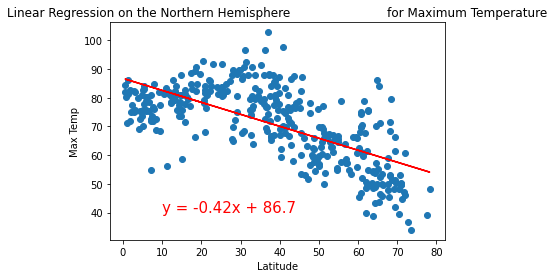

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

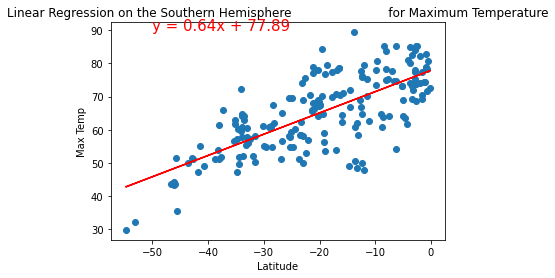

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

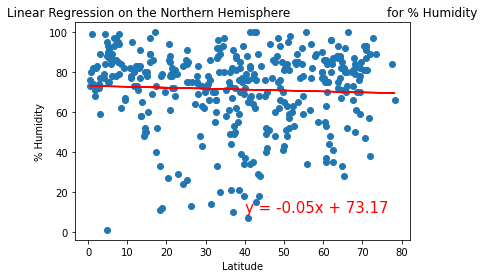

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

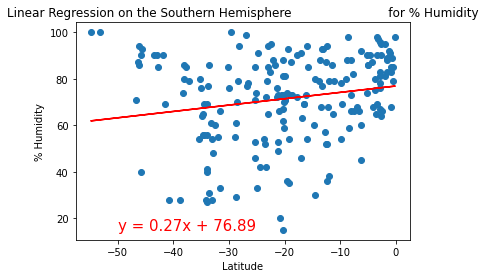

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

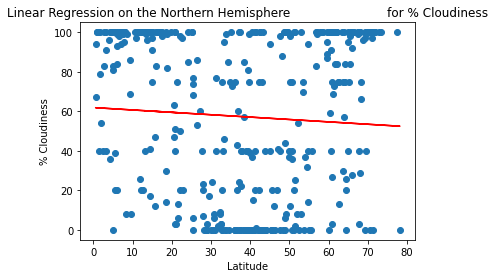

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

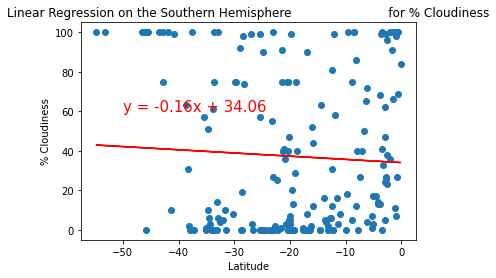

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

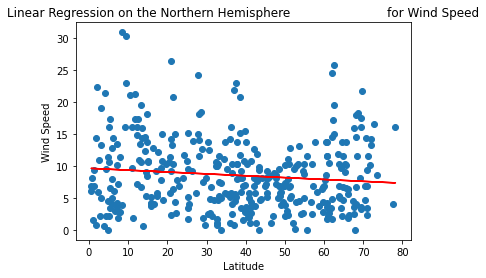

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

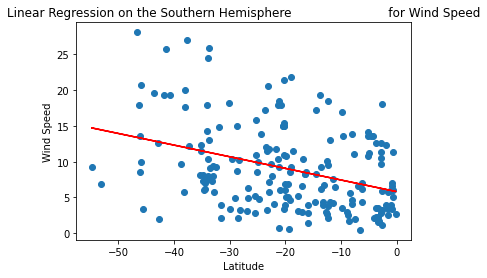

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))